# **Problem Statement**

In this project, we delve deep into the thriving sector of online retail by analyzing a transactional dataset avaialable at - "https://www.kaggle.com/datasets/carrie1/ecommerce-data/" . This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through customer segmentation. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the K-means clustering algorithm. This segmentation will allow us to understand the distinct profiles and preferences of different customer groups.

## Importing Necessary Libraries

In [ ]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


## Data Loading and Inspection

In [ ]:
#Load CSV file
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/subset_df.csv')

Mounted at /content/drive


In [ ]:
#Print Top 5 rows
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [ ]:
#Examining the Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406430 entries, 0 to 406429
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406430 non-null  object 
 1   StockCode    406430 non-null  object 
 2   Description  405088 non-null  object 
 3   Quantity     406430 non-null  int64  
 4   InvoiceDate  406430 non-null  object 
 5   UnitPrice    406430 non-null  float64
 6   CustomerID   302457 non-null  float64
 7   Country      406430 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [ ]:
#Dimensions of dataset
df.shape

(406430, 8)

<h2>Inferences</h2>

The dataset consists of 406,430 entries and 8 columns. Here is a brief overview of each column:

1) InvoiceNo: This is an object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.<br>

2) StockCode: An object data type column representing the product code for each item.<br>

3) Description: This column, also an object data type, contains descriptions of the products.<br>

4) Quantity: This is an integer column indicating the quantity of products purchased in each transaction.<br>

5) InvoiceDate: A datetime column that records the date and time of each transaction.<br>

6) UnitPrice: A float column representing the unit price of each product.<br>

7) CustomerID: A float column that contains the customer ID for each transaction.<br>

8) Country: An object column recording the country where each transaction took place.<br>

From a preliminary overview, it seems that there are missing values in the Description and CustomerID columns which need to be addressed. The InvoiceDate column is in object format, which need to be transfered. We also observe that a single customer can have multiple transactions as inferred from the repeated CustomerID in the initial rows.<br>

The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

## Summary Statistics

In [ ]:
# Summary statistics for numerical variables
df.describe().T

count          mean          std       min       25%      50%  \
Quantity    406430.0      9.782400   173.712839 -74215.00      1.00      3.0   
UnitPrice   406430.0      4.727577   103.290203 -11062.06      1.25      2.1   
CustomerID  302457.0  15267.713073  1718.012059  12346.00  13871.00  15125.0   

                 75%      max  
Quantity       11.00  74215.0  
UnitPrice       4.13  38970.0  
CustomerID  16779.00  18287.0

In [ ]:
# Summary statistics for categorical variables
df.describe(include='object').T

count unique                                 top    freq
InvoiceNo    406430  20320                              558475     705
StockCode    406430   3959                              85123A    1908
Description  405088   4064  WHITE HANGING HEART T-LIGHT HOLDER    1956
InvoiceDate  406430  18345                     6/29/2011 15:58     705
Country      406430     38                      United Kingdom  369682

# **Data Cleaning and Transformation**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406430 entries, 0 to 406429
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406430 non-null  object 
 1   StockCode    406430 non-null  object 
 2   Description  405088 non-null  object 
 3   Quantity     406430 non-null  int64  
 4   InvoiceDate  406430 non-null  object 
 5   UnitPrice    406430 non-null  float64
 6   CustomerID   302457 non-null  float64
 7   Country      406430 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [ ]:
# Checking for Nulls
null_percentages = (df.isnull().sum() / df.shape[0]) * 100

print("Columns and their Null Value Percentages:")
for column, percentage in null_percentages.items():
    if percentage > 0:
        print(f"{column}: {percentage:.2f}%")

Columns and their Null Value Percentages:
Description: 0.33%
CustomerID: 25.58%


In [ ]:
#Dropping rows with missing descriptions
df = df.dropna(subset=['Description'])

The percentage of null values in the 'Description' feature is extremely low, approximately 0.33%, making it advisable to opt for the approach of removing those rows.

In [ ]:
#Assign new category 'Missing' to all null values
df['CustomerID'].fillna('Missing', inplace=True)

# Convert the entire column to object (string)
df['CustomerID'] = df['CustomerID'].astype(str)


<ipython-input-11-13d8789be825>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'].fillna('Missing', inplace=True)


The 'CustomerID' feature exhibits a high percentage of null values, approximately 25.58%. Since 'CustomerID' serves as an identifier, it can be converted into an object data type, and we can assign the new category 'Missing' to all null values

In [ ]:
#Covert object column to datatime type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#Creating new column 'Revenue' by multiplying Quantity with Unit Price
df['Revenue']=df['Quantity']*df['UnitPrice']

Here we transformed our data model by adding a new feature 'Revenue' which signifies the total income generated by a business or organization per transaction which can be obtained by multiplying Quantity of items sold with Unit Price of each item.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405088 entries, 0 to 406429
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    405088 non-null  object        
 1   StockCode    405088 non-null  object        
 2   Description  405088 non-null  object        
 3   Quantity     405088 non-null  int64         
 4   InvoiceDate  405088 non-null  datetime64[ns]
 5   UnitPrice    405088 non-null  float64       
 6   CustomerID   405088 non-null  object        
 7   Country      405088 non-null  object        
 8   Revenue      405088 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 30.9+ MB


Above info cell summaries data after removing all null values, converting data types, and adding a new column.

In [ ]:
#Check For duplicates
df.duplicated().sum()

3274

In [ ]:
#Handling duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

 Duplicate rows might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system.

In [ ]:
df[(df['Quantity'] <1)]

InvoiceNo StockCode                          Description  Quantity  \
141      C536379         D                             Discount        -1   
154      C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                                  ...       ...   
405025   C571707     21155                RED RETROSPOT PEG BAG        -1   
405084   C571711     82486  3 DRAWER ANTIQUE WHITE WOOD CABINET        -1   
405085   C571711     23245           SET OF 3 REGENCY CAKE TINS        -1   
406404   C571750         M                               Manual        -1   
406405   C571750         M                               Manual        -1   

               InvoiceDate  UnitPrice CustomerID         Country  Revenue  
141    2010-12-01 09:41:00      27.50    14527.0  United Kingdom   -27.50  
154    2010-12-01 09:49:00       4.65    15311.0  United Kingdom    -4.65  
235    2010-12-01 10:24:00       1.65    17548.0  United Kingdom   -19.80  
236    2010-12-01 10:24:00       0.29    17548.0  United Kingdom    -6.96  
237    2010-12-01 10:24:00       0.29    17548.0  United Kingdom    -6.96  
...                    ...        ...        ...             ...      ...  
405025 2011-10-18 15:33:00       2.55    14056.0  United Kingdom    -2.55  
405084 2011-10-18 16:21:00       8.95    15296.0  United Kingdom    -8.95  
405085 2011-10-18 16:21:00       4.95    15296.0  United Kingdom    -4.95  
406404 2011-10-19 11:16:00    3949.32    12744.0       Singapore -3949.32  
406405 2011-10-19 11:16:00    2118.74    12744.0       Singapore -2118.74  

[7752 rows x 9 columns]

In [ ]:
#Removing Returned / Cancelled Transactions
df=df[(df['Quantity'] >=1)]

All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.This transactions are irrelevant as we're trying to form clusters of customers based on their location and spending, hence these rows can be removed

In [ ]:
df[df['UnitPrice'] < 1]

InvoiceNo StockCode                        Description  Quantity  \
29        536370     21724    PANDA AND BUNNIES STICKER SHEET        12   
30        536370     21883                   STARS GIFT TAPE         24   
31        536370     10002        INFLATABLE POLITICAL GLOBE         48   
38        536370     22661    CHARLOTTE BAG DOLLY GIRL DESIGN        20   
42        536370     22540         MINI JIGSAW CIRCUS PARADE         24   
...          ...       ...                                ...       ...   
406394    571748     22651        GENTLEMAN SHIRT REPAIR KIT         10   
406402    571749     23365  SET 12 COLOUR PENCILS LOVE LONDON        32   
406414    571779     22268           DECORATION SITTING BUNNY         3   
406421    571779     22600      CHRISTMAS RETROSPOT STAR WOOD         6   
406429    571779     22155             STAR DECORATION RUSTIC        12   

               InvoiceDate  UnitPrice CustomerID         Country  Revenue  
29     2010-12-01 08:45:00       0.85    12583.0          France    10.20  
30     2010-12-01 08:45:00       0.65    12583.0          France    15.60  
31     2010-12-01 08:45:00       0.85    12583.0          France    40.80  
38     2010-12-01 08:45:00       0.85    12583.0          France    17.00  
42     2010-12-01 08:45:00       0.42    12583.0          France    10.08  
...                    ...        ...        ...             ...      ...  
406394 2011-10-19 11:13:00       0.85    18077.0  United Kingdom     8.50  
406402 2011-10-19 11:16:00       0.65    17934.0  United Kingdom    20.80  
406414 2011-10-19 11:27:00       0.19    12748.0  United Kingdom     0.57  
406421 2011-10-19 11:27:00       0.85    12748.0  United Kingdom     5.10  
406429 2011-10-19 11:27:00       0.42    12748.0  United Kingdom     5.04  

[81408 rows x 9 columns]

In [ ]:
# Removing records with a unit price of zero to avoid potential data entry errors
df = df[df['UnitPrice'] >=1 ]

Including transactions with a unit price of zero in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm. Hence these rows can be removed.

In [ ]:
df.shape

(312654, 9)

# **Exploratory Data Analysis**

### **Univariate Analysis**

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [ ]:
df['InvoiceNo'].value_counts()

537434    609
538071    579
538349    563
537237    547
536592    540
         ... 
569382      1
556456      1
562883      1
541412      1
558387      1
Name: InvoiceNo, Length: 15181, dtype: int64

[Text(0.5, 0, 'InvoiceNo'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'InvoiceNo Distribution')]

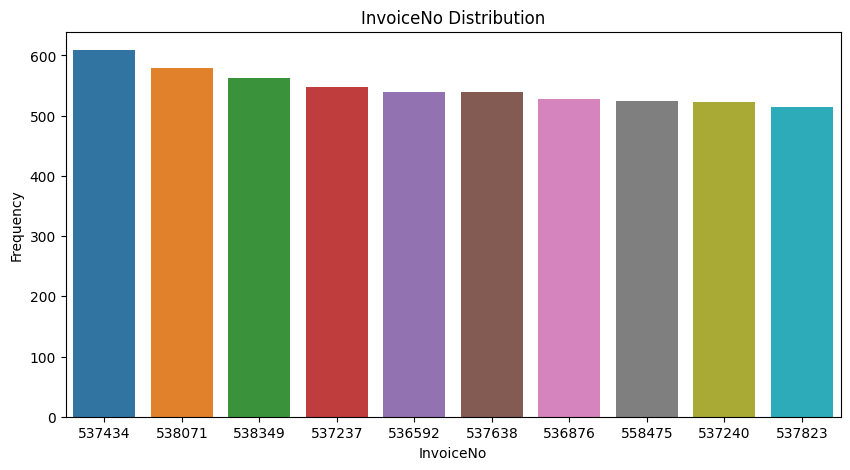

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df['InvoiceNo'].value_counts()[0:10].index,y=df['InvoiceNo'].value_counts()[0:10].values,ax=ax)
ax.set(xlabel='InvoiceNo', ylabel='Frequency', title='InvoiceNo Distribution')

Based on the graph presented above, it is evident that the majority of transactions are associated with Invoice No. 558475, followed by 537434 and 538071.

In [ ]:
df['StockCode'].value_counts()

85123A    1858
85099B    1739
22423     1680
47566     1548
20725     1336
          ... 
23646        1
85036b       1
21506        1
21507        1
23702        1
Name: StockCode, Length: 3450, dtype: int64

[Text(0.5, 0, 'Stockcode'),
 Text(0, 0.5, 'Frequncy'),
 Text(0.5, 1.0, 'Top 10 Stockcodes')]

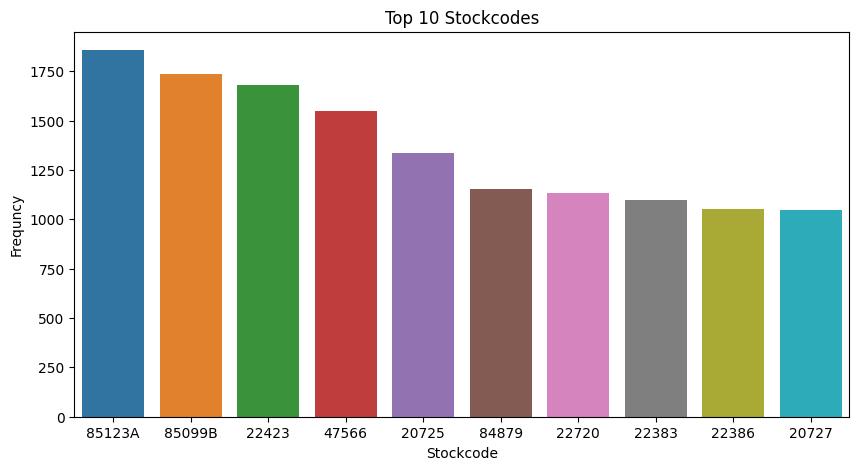

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df['StockCode'].value_counts()[0:10].index,y=df['StockCode'].value_counts()[0:10].values,ax=ax)
ax.set(xlabel='Stockcode', ylabel='Frequncy', title='Top 10 Stockcodes')

From the above graph we can infer that top 10 stock codes are "85123A" followed by "85099B" and "22423".

[Text(0.5, 0, 'Sales Frequency'),
 Text(0, 0.5, 'Description'),
 Text(0.5, 1.0, 'Top 10 most bought items')]

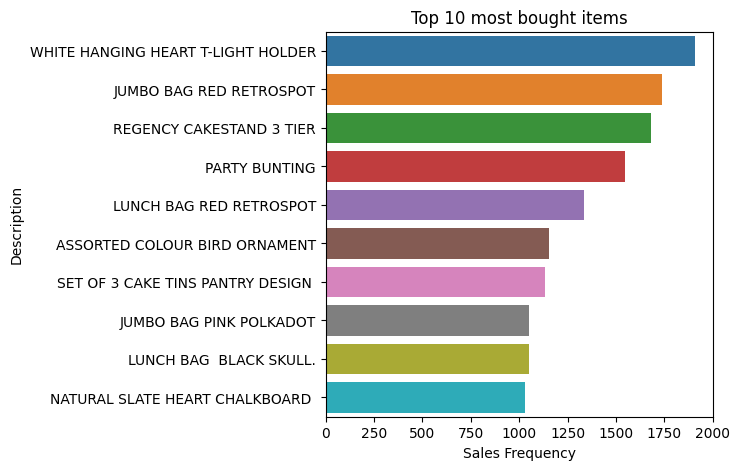

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 5))
sns.barplot(x=df['Description'].value_counts()[0:10].values,y=df['Description'].value_counts()[0:10].index,ax=ax)
ax.set(xlabel='Sales Frequency', ylabel='Description', title='Top 10 most bought items')

<ipython-input-29-f3bec4447d1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


<Axes: xlabel='Quantity', ylabel='Density'>

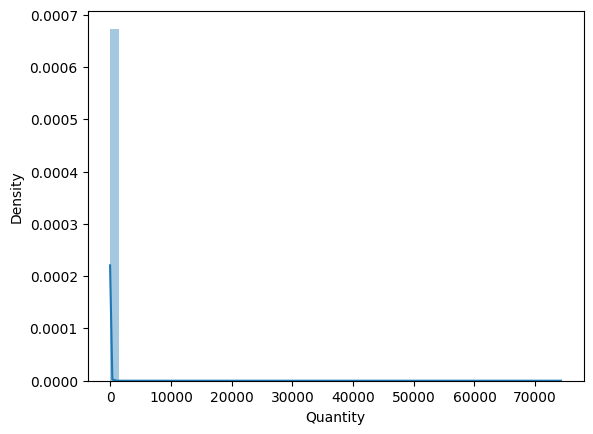

In [ ]:
sns.distplot(df['Quantity'])

In [ ]:
df['Quantity'].skew()

523.4316875575041

As skew value is approximatelt 540, we can deduce that the distribution is highly right skewed, hence we use IQR method to remove outliers

In [ ]:
#Setting IQR Treshold value as 1.5
iqr_threshold = 1.5

#Finding Quarters
Q1 = df['Quantity'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)

#Deducing IQR Value
IQR = Q3 - Q1

#Calculating Lower and Upper bounds
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR

#Transforming data frame
df = df[(df['Quantity'] >= lower_bound) & (df['Quantity'] <= upper_bound)]

<ipython-input-32-f3bec4447d1e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Quantity'])


<Axes: xlabel='Quantity', ylabel='Density'>

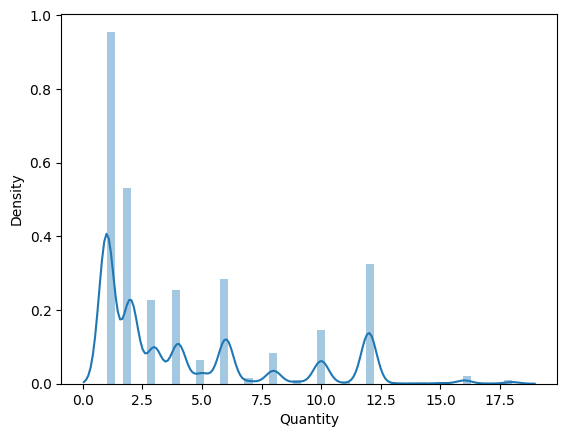

In [ ]:
sns.distplot(df['Quantity'])

In [ ]:
df['Quantity'].skew()

1.1674210893207926

After removing outliers skew value is less than 2 which implies that column is free of outliers

In [ ]:
#Year Wise Analysis
df['InvoiceDate'].dt.year.value_counts()

2011    257738
2010     32503
Name: InvoiceDate, dtype: int64

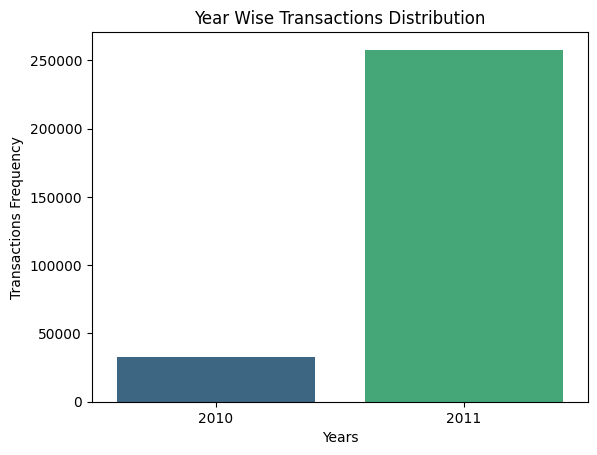

In [ ]:
sns.countplot(x=df['InvoiceDate'].dt.year, data=df, palette='viridis')

# Set the x-axis label
plt.xlabel("Years")
plt.ylabel("Transactions Frequency")
plt.title("Year Wise Transactions Distribution")
# Display the plot
plt.show()

Only few transactions are made in the year 2010 compared to 2011 in our dataset

In [ ]:
#Quarter wise analysis
df['InvoiceDate'].dt.quarter.value_counts()

3    86072
2    74251
1    72673
4    57245
Name: InvoiceDate, dtype: int64

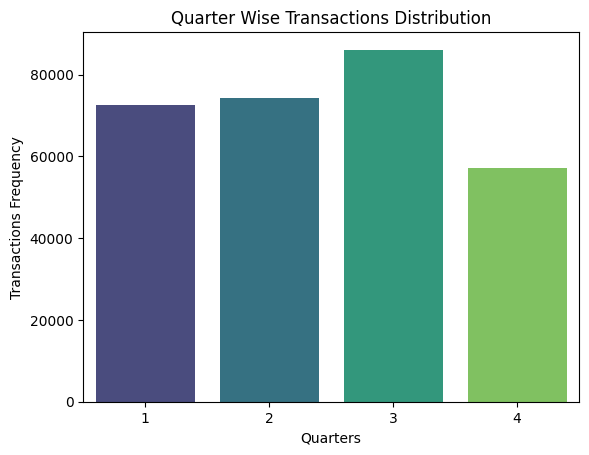

In [ ]:
sns.countplot(x=df['InvoiceDate'].dt.quarter, data=df, palette='viridis')

# Set the x-axis label
plt.xlabel("Quarters")
plt.ylabel("Transactions Frequency")
plt.title("Quarter Wise Transactions Distribution")

# Display the plot
plt.show()

Q3 has highest no.of tarnsactions compare to Q4 which indicates customers buying is more in last months of a year

In [ ]:
df['InvoiceDate'].dt.month.value_counts()

9     34808
12    32503
5     26940
7     26729
3     26531
6     26206
1     25409
10    24742
8     24535
4     21105
2     20733
Name: InvoiceDate, dtype: int64

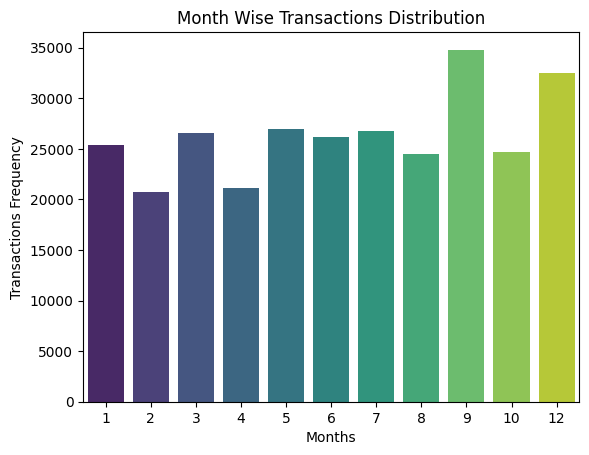

In [ ]:
sns.countplot(x=df['InvoiceDate'].dt.month, data=df, palette='viridis')

# Set the x-axis label
plt.xlabel("Months")
plt.ylabel("Transactions Frequency")
plt.title("Month Wise Transactions Distribution")

# Display the plot
plt.show()


Over the course of the year, we observe fluctuations in transaction volumes, with the highest number of transactions occurring in October.

<ipython-input-40-0cb328187ed8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


<Axes: xlabel='UnitPrice', ylabel='Density'>

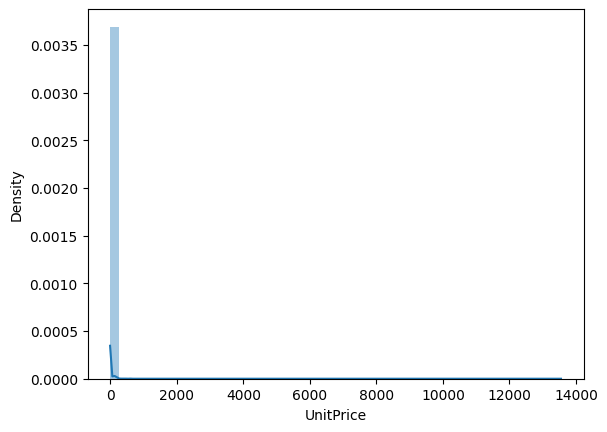

In [ ]:
sns.distplot(df['UnitPrice'])

In [ ]:
#Finding Skew Value
df['UnitPrice'].skew()

191.9662061955417

As skew value is approximatelt 210, we can deduce that the distribution is highly right skewed, hence we use IQR method to remove outliers

In [ ]:
#Setting IQR Treshold value as 1.5
iqr_threshold = 1.5

#Finding Quarters
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)

#Deducing IQR Value
IQR = Q3 - Q1

#Calculating Lower and Upper bounds
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR

#Transforming data frame
df = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

<ipython-input-43-0cb328187ed8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['UnitPrice'])


<Axes: xlabel='UnitPrice', ylabel='Density'>

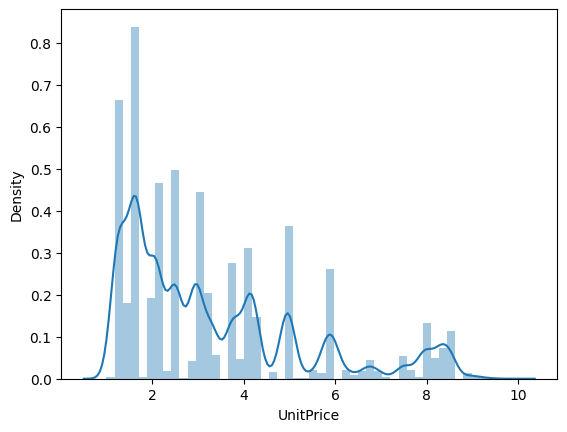

In [ ]:
sns.distplot(df['UnitPrice'])

In [ ]:
df['UnitPrice'].skew()

1.1372087263663289

After removing outliers skew value is less than 2 which implies that column is free of outliers

[Text(0.5, 0, 'Transactions Frequency'),
 Text(0, 0.5, 'Country Name'),
 Text(0.5, 1.0, 'Top 10 Country')]

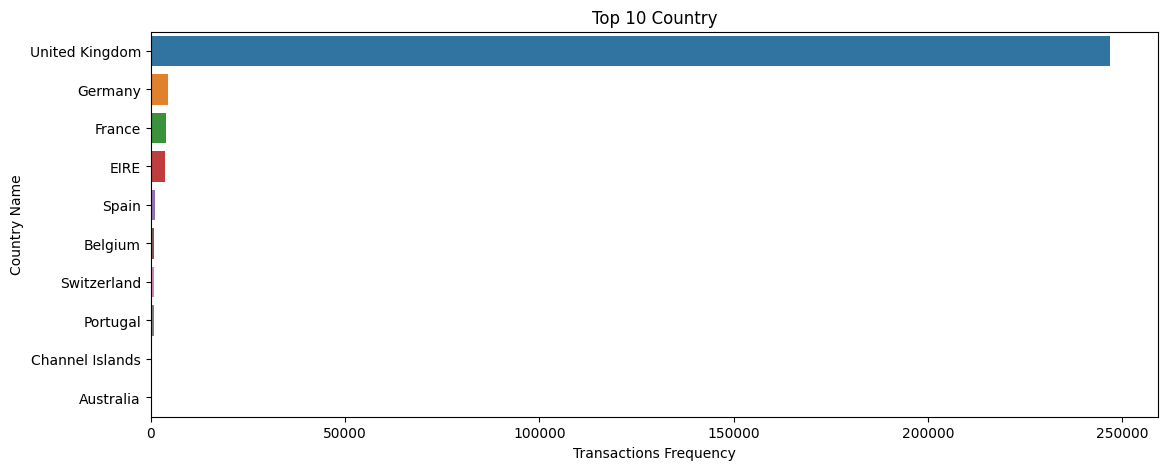

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(13, 5))
sns.barplot(x=df['Country'].value_counts()[0:10].values,y=df['Country'].value_counts()[0:10].index,ax=ax)
ax.set(xlabel='Transactions Frequency', ylabel='Country Name', title='Top 10 Country')

In [ ]:
df['CustomerID'].value_counts()

Missing    75651
17841.0     3906
14911.0     2626
14606.0     1617
12748.0     1594
           ...  
12855.0        1
16836.0        1
16276.0        1
13185.0        1
13120.0        1
Name: CustomerID, Length: 3653, dtype: int64

[Text(0.5, 0, 'CustomerID'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Top 10 Customers')]

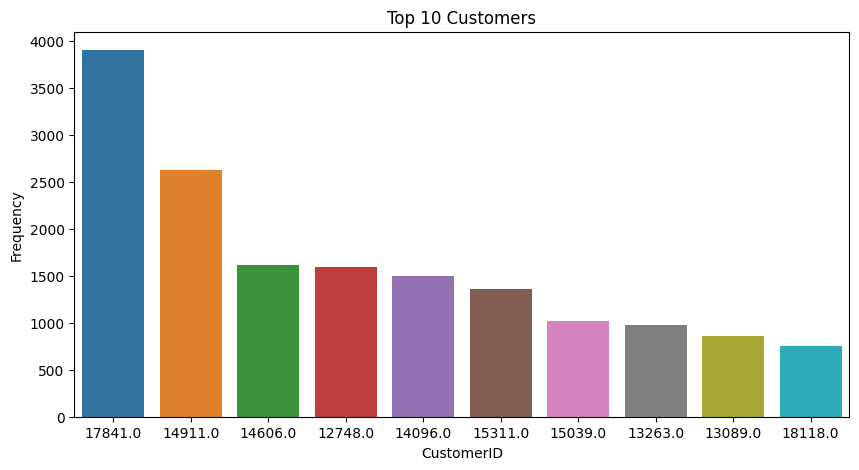

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df['CustomerID'].value_counts()[1:11].index,y=df['CustomerID'].value_counts()[1:11].values,ax=ax)
ax.set(xlabel='CustomerID', ylabel='Frequency', title='Top 10 Customers')

Creating a visualization of the top customers with the highest transaction counts while excluding records with missing customer IDs.

## **Bivariate Analysis**

In [ ]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Revenue'],
      dtype='object')

In [ ]:
#Creating new dataframe by grouping InoviceNo with Revenue generated

df_in_vs_rev=df.groupby(['InvoiceNo'])['Revenue'].sum().sort_values(ascending=False)[0:10]
df_in_vs_rev

InvoiceNo
537434    4741.20
537240    4439.94
538071    4422.18
558475    4349.05
537237    4175.00
536876    4119.26
537638    4096.23
538349    4023.64
562955    3992.29
536592    3642.22
Name: Revenue, dtype: float64

[Text(0.5, 0, 'Invoice No.'),
 Text(0, 0.5, 'Revenure Generated'),
 Text(0.5, 1.0, 'InvoiceNo Distribution')]

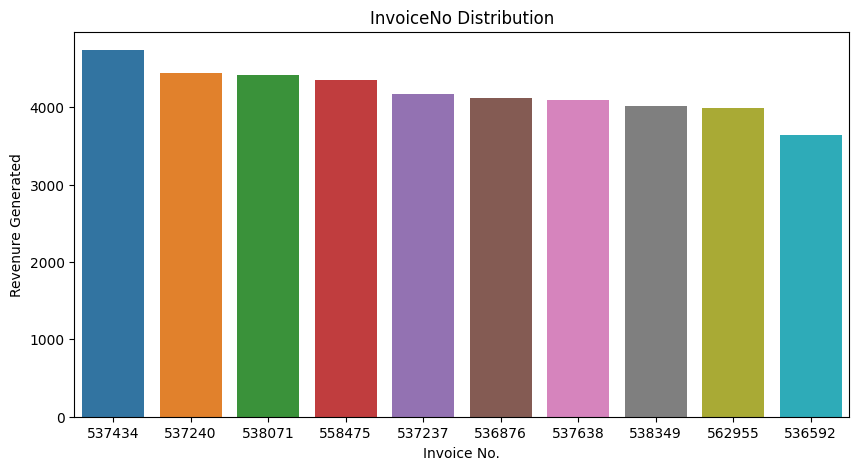

In [ ]:
#Visualizing InvoiceNo Distribution In accordance with Revenue Generated

fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df_in_vs_rev.index,y=df_in_vs_rev.values,ax=ax)
ax.set(xlabel='Invoice No.', ylabel='Revenure Generated', title='InvoiceNo Distribution')

In [ ]:
#Creating new dataframe by grouping Stock Codes with Revenue generated per Stock

df_rev_vs_sc=df.groupby(['StockCode'])['Revenue'].sum().sort_values(ascending=False)[0:10]
df_rev_vs_sc

StockCode
47566     30724.45
85123A    27121.55
22960     19931.38
85099B    19492.55
23298     19309.95
22457     16342.30
22720     15110.47
84879     15046.45
82484     13634.05
82486     13351.25
Name: Revenue, dtype: float64

[Text(0.5, 0, 'Stock Code'),
 Text(0, 0.5, 'Revenue Gnerated'),
 Text(0.5, 1.0, 'Top 10 Stockcodes')]

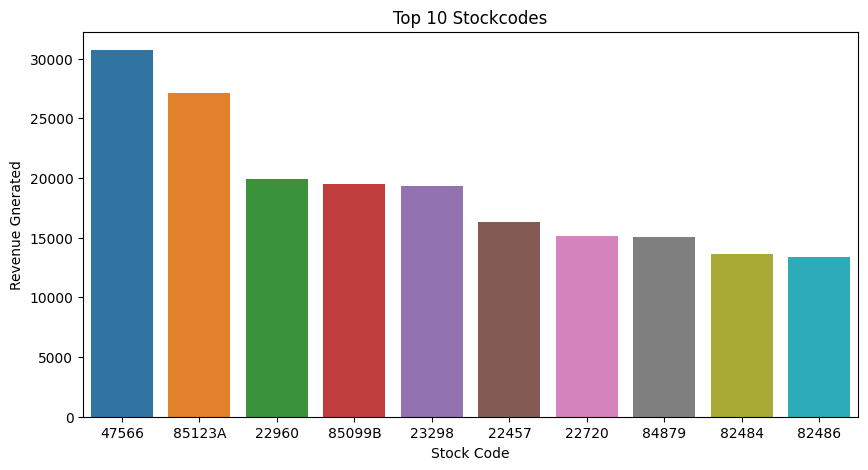

In [ ]:
#Visualizing Top 10 Stock Codes in accordance with Revenue Generated

fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df_rev_vs_sc.index,y=df_rev_vs_sc.values,ax=ax)
ax.set(xlabel='Stock Code', ylabel='Revenue Gnerated', title='Top 10 Stockcodes')

In [ ]:
#Creating new dataframe by grouping Item Names with Revenue generated by each item

df_in_vs_desc=df.groupby(['Description'])['Revenue'].sum().sort_values(ascending=False)[0:10]
df_in_vs_desc

Description
PARTY BUNTING                         30724.45
WHITE HANGING HEART T-LIGHT HOLDER    27871.58
JAM MAKING SET WITH JARS              19931.38
JUMBO BAG RED RETROSPOT               19492.55
SPOTTY BUNTING                        19131.75
NATURAL SLATE HEART CHALKBOARD        16342.30
SET OF 3 CAKE TINS PANTRY DESIGN      15110.47
ASSORTED COLOUR BIRD ORNAMENT         15046.45
WOOD BLACK BOARD ANT WHITE FINISH     13634.05
HOME BUILDING BLOCK WORD              13098.70
Name: Revenue, dtype: float64

[Text(0.5, 0, 'Revenue Generated'),
 Text(0, 0.5, 'Description'),
 Text(0.5, 1.0, 'Top 10 Items')]

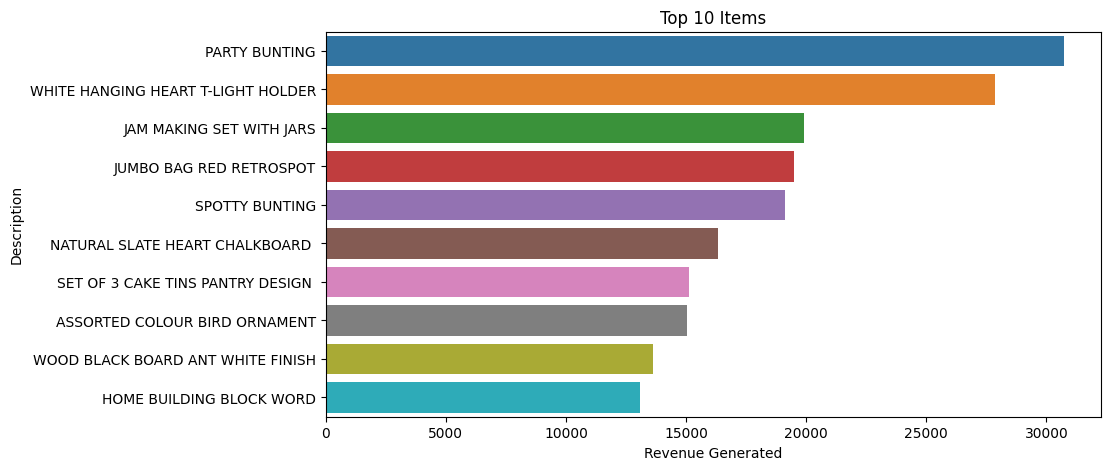

In [ ]:
#Visualizing Top 10 Items in accordance with Revenue Generated

fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df_in_vs_desc.values,y=df_in_vs_desc.index,ax=ax)
ax.set(xlabel='Revenue Generated', ylabel='Description', title='Top 10 Items')

In [ ]:
#Createing copy of original data frame for data modelling
df2=df.copy()

#Creating new column Year-Quarter to analyse Year and Quarter wise Revenue Generated
df2['year_quarter'] = df2['InvoiceDate'].dt.year.astype(str) + ' - ' + df2['InvoiceDate'].dt.quarter.astype(str)


In [ ]:
df2.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Revenue  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom    15.30   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom    20.34   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom    22.00   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom    20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom    20.34   

  year_quarter  
0     2010 - 4  
1     2010 - 4  
2     2010 - 4  
3     2010 - 4  
4     2010 - 4

In [ ]:
#Year-Quarter wise revenue generated
df_yq_vs_rev=df2.groupby(['year_quarter'])['Revenue'].sum().sort_index()
df_yq_vs_rev

year_quarter
2010 - 4     339770.04
2011 - 1     793389.45
2011 - 2     854220.07
2011 - 3    1021699.22
2011 - 4     297698.63
Name: Revenue, dtype: float64

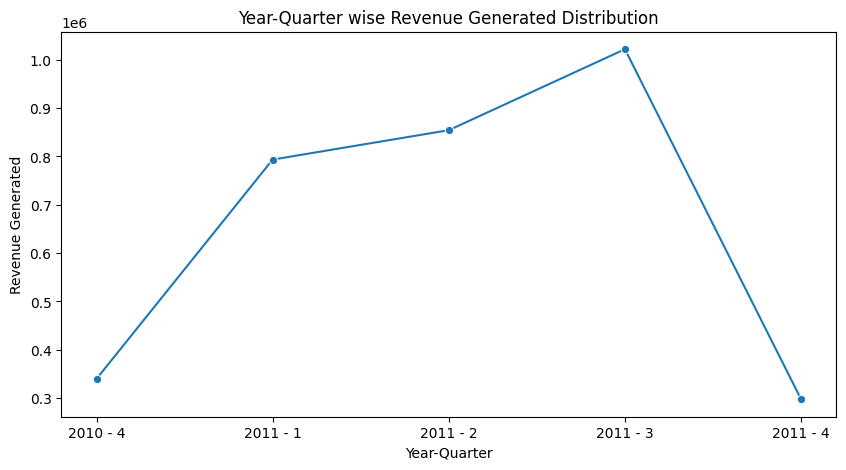

In [ ]:
#Visulaising Year-Quarter wise revenue generated trend
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.lineplot(x=df_yq_vs_rev.index, y=df_yq_vs_rev.values, marker='o', linestyle='-')

# Set the x-axis label
plt.xlabel("Year-Quarter")
plt.ylabel("Revenue Generated")
plt.title("Year-Quarter wise Revenue Generated Distribution")

# Display the plot
plt.show()

In [ ]:
#Month wise revenue generated
df_ym_vs_rev= df.groupby(df['InvoiceDate'].dt.month)['Revenue'].sum()
df_ym_vs_rev

InvoiceDate
1     266656.11
2     231346.11
3     295387.23
4     234880.94
5     326826.93
6     292512.20
7     291696.81
8     295008.62
9     434993.79
10    297698.63
12    339770.04
Name: Revenue, dtype: float64

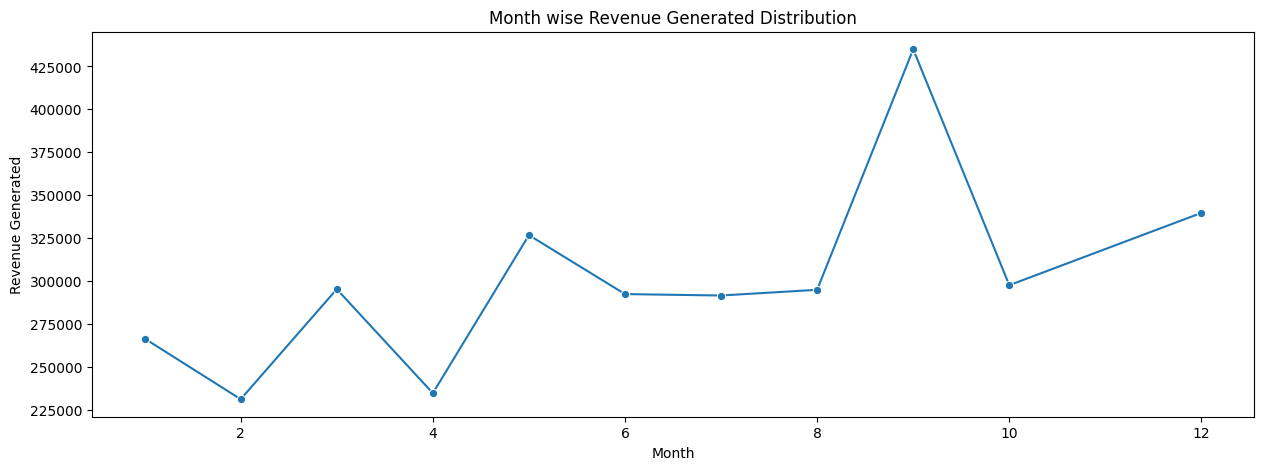

In [ ]:
#Visulaising Month wise revenue generated trend
fig, ax = plt.subplots(1,1, figsize=(15, 5))
sns.lineplot(x=df_ym_vs_rev.index, y=df_ym_vs_rev.values, marker='o', linestyle='-',ax=ax)

# Set the x-axis label
plt.xlabel("Month")
plt.ylabel("Revenue Generated")
plt.title("Month wise Revenue Generated Distribution")

# Display the plot
plt.show()

In [ ]:
#Top 10 Customers in accordance with Revenue
df_cust_vs_rev=df.groupby(['CustomerID'])['Revenue'].sum().sort_values(ascending=False)[1:11]
df_cust_vs_rev

CustomerID
14911.0    52528.21
13089.0    21948.02
17841.0    19690.06
14156.0    13837.59
15039.0    12344.44
15311.0    11541.25
14096.0    11138.65
14298.0    10687.74
17675.0    10334.46
12748.0    10142.35
Name: Revenue, dtype: float64

[Text(0.5, 0, 'Revenue'),
 Text(0, 0.5, 'Customer ID'),
 Text(0.5, 1.0, 'Customer vs Revenue')]

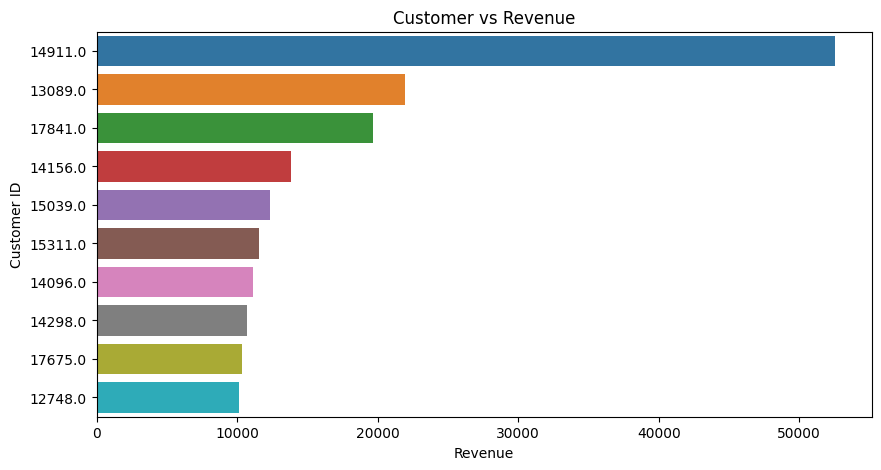

In [ ]:
#Visualising Top 10 Customers in accordance with Revenue
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df_cust_vs_rev.values,y=df_cust_vs_rev.index,ax=ax)
ax.set(xlabel='Revenue', ylabel='Customer ID', title='Customer vs Revenue')

In [ ]:
#Top 10 Countries in accordance with Revenue
df_cnt_vs_rev=df.groupby(['Country'])['Revenue'].sum().sort_values(ascending=False)[0:10]
df_cnt_vs_rev

Country
United Kingdom     2898326.47
Germany              89860.64
EIRE                 76246.24
France               73085.62
Spain                19400.07
Switzerland          19215.09
Belgium              18207.28
Portugal             12871.37
Channel Islands       9699.21
Norway                9583.07
Name: Revenue, dtype: float64

[Text(0.5, 0, 'Revenue'),
 Text(0, 0.5, 'Country Name'),
 Text(0.5, 1.0, 'Country vs Revenue')]

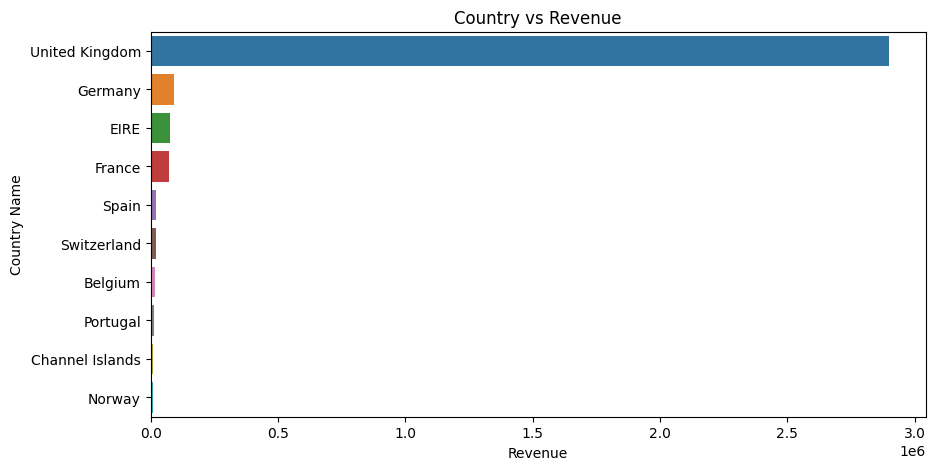

In [ ]:
#Visualising Top 10 Countries in accordance with Revenue
fig, ax = plt.subplots(1,1, figsize=(10, 5))
sns.barplot(x=df_cnt_vs_rev.values,y=df_cnt_vs_rev.index,ax=ax)
ax.set(xlabel='Revenue', ylabel='Country Name', title='Country vs Revenue')

# **Feature Engineering**

Feature engineering is the process of creating new, relevant, and informative features from existing data to improve the performance of machine learning models. It involves transforming, selecting, or creating new features that can capture important patterns or relationships in the data.

Label encoding is a specific technique in feature engineering used for converting categorical data into numerical form. In label encoding, each unique category or label in a categorical feature is assigned a unique integer value. This allows machine learning algorithms to work with categorical data, as many algorithms require numerical input.

In [ ]:
df.Country.value_counts()

United Kingdom          246879
Germany                   4435
France                    3832
EIRE                      3770
Spain                     1223
Belgium                    978
Switzerland                908
Portugal                   744
Channel Islands            452
Australia                  407
Norway                     404
Cyprus                     348
Italy                      346
Netherlands                341
Finland                    319
Unspecified                260
Austria                    217
Poland                     172
Israel                     157
Hong Kong                  150
Denmark                    134
Sweden                     120
Singapore                  117
Iceland                     89
Canada                      84
USA                         84
Malta                       78
Greece                      68
RSA                         47
European Community          42
Japan                       41
United Arab Emirates        41
Lebanon 

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the categorical data
df.Country = label_encoder.fit_transform(df.Country)


The 'Country' column has been encoded because the KMeans algorithm requires numeric inputs, and our goal is to create clusters based on the revenue generated and quantities sold per transaction, categorized by each country.

In [ ]:
df.Country.value_counts()


36    246879
14      4435
13      3832
10      3770
31      1223
3        978
33       908
27       744
6        452
0        407
25       404
7        348
19       346
24       341
12       319
37       260
1        217
26       172
18       157
16       150
9        134
32       120
30       117
17        89
5         84
34        84
23        78
15        68
28        47
11        42
20        41
35        41
21        35
22        23
4         23
2         10
29         8
8          6
Name: Country, dtype: int64

## **Reference Table**

We've included a reference table for viewing the encoded values corresponding to each country.

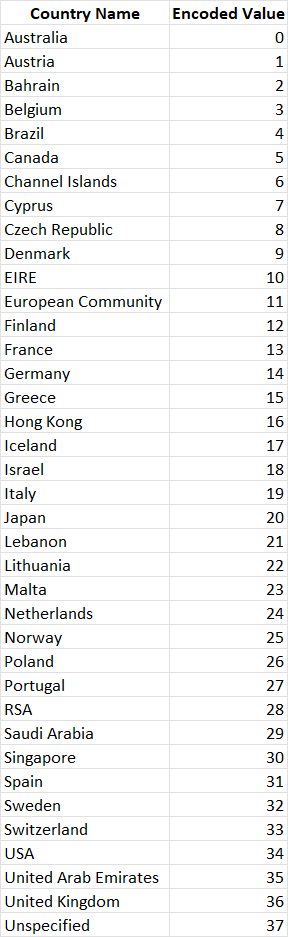

# **Model Building**

In [ ]:
#Extracting the 'Quantity,' 'Revenue,' and 'Country' columns as a NumPy array for further analysis.
X=df[['Quantity','Revenue','Country']].values

In [ ]:
X

array([[ 6.  , 15.3 , 36.  ],
       [ 6.  , 20.34, 36.  ],
       [ 8.  , 22.  , 36.  ],
       ...,
       [ 2.  ,  4.16, 36.  ],
       [ 2.  ,  2.5 , 36.  ],
       [ 1.  ,  8.25, 36.  ]])

In [ ]:
#Building KMeans Algorithm with K value as 3
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [ ]:
#Making Predictions
predict = kmean.predict(X)

In [ ]:
#Finding Optimal K value using Elbow Method
k_inertia = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    print('K Value -',i,'Inertia -',km.inertia_)
    k_inertia.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 1 Inertia - 50753722.065127335


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 2 Inertia - 29633984.011747405


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 3 Inertia - 17939622.713310387


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 4 Inertia - 10105893.356498625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 5 Inertia - 7223503.91703332


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 6 Inertia - 5919738.337908063


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 7 Inertia - 5139102.448675323


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 8 Inertia - 4437836.062364997


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 9 Inertia - 3911273.982842906


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K Value - 10 Inertia - 3417176.3093922324


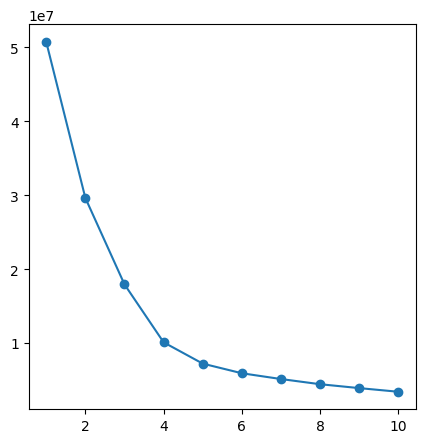

In [ ]:
#Plotting K values against Inertia
fig = plt.figure(figsize=(5, 5))
plt.scatter(range(1,11),k_inertia)
plt.plot(range(1,11),k_inertia)
plt.show()

The elbow method is a technique to determine the best number of clusters (K) in K-means clustering. It involves plotting the Inertia value against different K values and selecting the K where the rate of decrease in inertia values slows down, resembling an "elbow" in the graph. This point represents the optimal number of clusters.

Based on the above graph, it's evident that at K=4, the rate of decrease in inertia values significantly decelerates. Therefore, we can conclude that the optimal K value is 4.

In [ ]:
#Building KMeans Model with K=4
kmean = KMeans(n_clusters=4)
kmean.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [ ]:
#Making Predcitions
new_predict = kmean.predict(X)

In [ ]:
from sklearn.metrics import silhouette_score
# Calculate the silhouette score
silhouette_avg = silhouette_score(X, new_predict)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.6128230454370989


A new DataFrame has been generated, incorporating the 'Quantity,' 'Revenue,' 'Country,' and 'Predicted Clusters' values.

In [ ]:
#Creating new dataframe
new_df=pd.DataFrame(X)
new_df.columns=['Quantity','Revenue','Country']

#Adding predicted clusters to each transaction as new feature
new_df['Clusters']=new_predict
new_df.head()

Quantity  Revenue  Country  Clusters
0       6.0    15.30     36.0         1
1       6.0    20.34     36.0         1
2       8.0    22.00     36.0         1
3       6.0    20.34     36.0         1
4       6.0    20.34     36.0         1

In [ ]:
new_df.Clusters.value_counts().sort_index()

0    148696
1     96497
2      6856
3     15343
Name: Clusters, dtype: int64

We have employed a 3D scatter plot for visualizing the clusters, utilizing Plotly for its ability to create interactive and dynamic graphs, enhancing the user's engagement and exploration of the data.

In [ ]:
import plotly.express as px
figure = px.scatter_3d(new_df,
                    color='Clusters',
                    x="Country",
                    y="Quantity",
                    z="Revenue",

                    )
figure.update_layout()
figure.show()

# **Inferences**

### **Cluster 0**

Cluster 0 accommodates only a limited number of customers, with revenue generated by these customers ranging from 0 to 10 units. The majority of them are associated with countries spanning from Israel to the United Kingdom. Regarding the quantities of items purchased, there is a consistent distribution within the range of 1 to 8 units.

### **Cluster 1**

Within Cluster 1, the range of revenue generated by customers varies from a minimum of 13 units to a maximum of 40 units. All of these customers are affiliated with countries numbered 24 through 37, encompassing regions from Netherlands to the United Kingdom. The quantity of items purchased by customers in this cluster falls within the range of 2 to 8 products

### **Cluster 2**

Cluster 2 exhibits a uniform distribution in the quantity of items purchased, spanning from 1 to 18 units. The revenue generated within this cluster falls within the range of 1 to 51 units, and the customers in this group hail from countries spanning from Australia to the Lebanon.

### **Cluster 3**

 Cluster 3 customers encompass individuals from all the countries included in our dataset. Additionally, they represent the highest revenue-generating segment, with their revenue falling within the range of 52 to 160 units. Furthermore, the quantity of items purchased by this cluster ranges from 5 to 18

### **Reference Table**

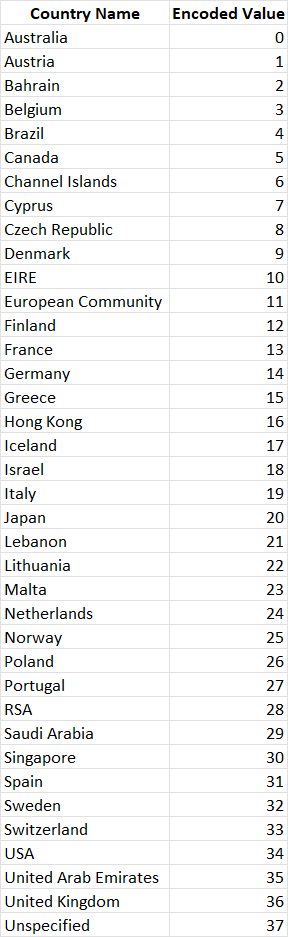